In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()

In [ ]:
X = data.data

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(X, columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])
df.sample(4)

,sepal_len,sepal_wid,petal_len,petal_wid
137,6.4,3.1,5.5,1.8
53,5.5,2.3,4.0,1.3
67,5.8,2.7,4.1,1.0
125,7.2,3.2,6.0,1.8


In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df['target']= data.target

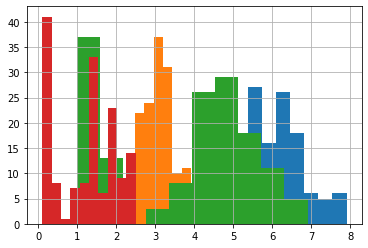

In [ ]:
df['sepal_len'].hist()
df['sepal_wid'].hist()
df['petal_len'].hist()
df['petal_wid'].hist()

In [ ]:
df.corr()

,sepal_len,sepal_wid,petal_len,petal_wid,target
sepal_len,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_wid,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_len,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_wid,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df.drop(columns=['target'])
y= df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='auto')

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
accuracy = model.score(X_test,y_test)*100

In [ ]:
accuracy

94.73684210526315

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 14]])

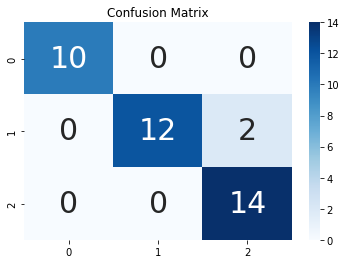

In [ ]:
import seaborn as sns
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
df1 = pd.read_csv("/content/mammographic_masses.data")

In [ ]:
df1.rename(columns = {'5':'col1'}, inplace = True)

In [ ]:
df1.rename(columns = {'67':'col2', '3':'col3', '5.1': 'col4', '3.1':'col5', '1': 'target'}, inplace = True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    960 non-null    object
 1   col2    960 non-null    object
 2   col3    960 non-null    object
 3   col4    960 non-null    object
 4   col5    960 non-null    object
 5   target  960 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [ ]:
# Splitting the dataset into the Training set and Test set
X = df1.iloc[:, [0,1,2,3,4]].values
y = df1.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# df1 = df1.astype({'col1':int, 'col2':int, 'col3':int, 'col4':int, 'col5':int})
df1['col1'] = df1['col1'].astype(int)

ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored

In [ ]:
df1.sample(5)

,col1,col2,col3,col4,col5,target
523,2,57,1,1,3,0
411,4,62,4,2,3,0
879,4,54,4,5,3,1
787,4,67,4,4,3,1
644,4,57,2,4,3,0
